In [1]:
# !chmod 600 /content/kaggle.json
# !mkdir ~/.kaggle
# !mv /content/kaggle.json ~/.kaggle/kaggle.json

In [2]:
# !kaggle datasets download -d raman77768/movie-classifier

 98% 242M/248M [00:03<00:00, 67.3MB/s]
100% 248M/248M [00:03<00:00, 74.5MB/s]


In [ ]:
# !unzip movie-classifier.zip

In [1]:
!pip install kmodes

In [1]:
import numpy as np
from kmodes.kmodes import KModes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Multi_Label_dataset/train.csv')
df = df.dropna()
df

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,tt2409818,"['Action', 'Crime', 'Thriller']",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7250,tt2062622,"['Animation', 'Comedy', 'Family']",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7251,tt2442502,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7252,tt3455850,['Documentary'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# 데이터 로드
X = df

# k-modes 모델 생성
n_clusters = 9
km = KModes(n_clusters=n_clusters)

# 모델 학습
clusters = km.fit_predict(X)

# 클러스터링 결과 출력
for i in range(n_clusters):
    cluster_data = X[clusters == i]
    print('Cluster {}: {}'.format(i, cluster_data))

Cluster 0:              Id                          Genre  Action  Adventure  Animation  \
0     tt0086425            ['Comedy', 'Drama']       0          0          0   
1     tt0085549  ['Drama', 'Romance', 'Music']       0          0          0   
6     tt0086361  ['Drama', 'Music', 'Romance']       0          0          0   
7     tt0085970            ['Comedy', 'Drama']       0          0          0   
11    tt0085244            ['Comedy', 'Drama']       0          0          0   
...         ...                            ...     ...        ...        ...   
7239  tt3509804          ['Drama', 'Thriller']       0          0          0   
7241  tt1241226                   ['Thriller']       0          0          0   
7245  tt2570224  ['Comedy', 'Drama', 'Family']       0          0          0   
7246  tt2505856                     ['Horror']       0          0          0   
7253  tt4179482                  ['Animation']       0          0          1   

      Biography  Comedy  Cri

Best number of clusters:  9


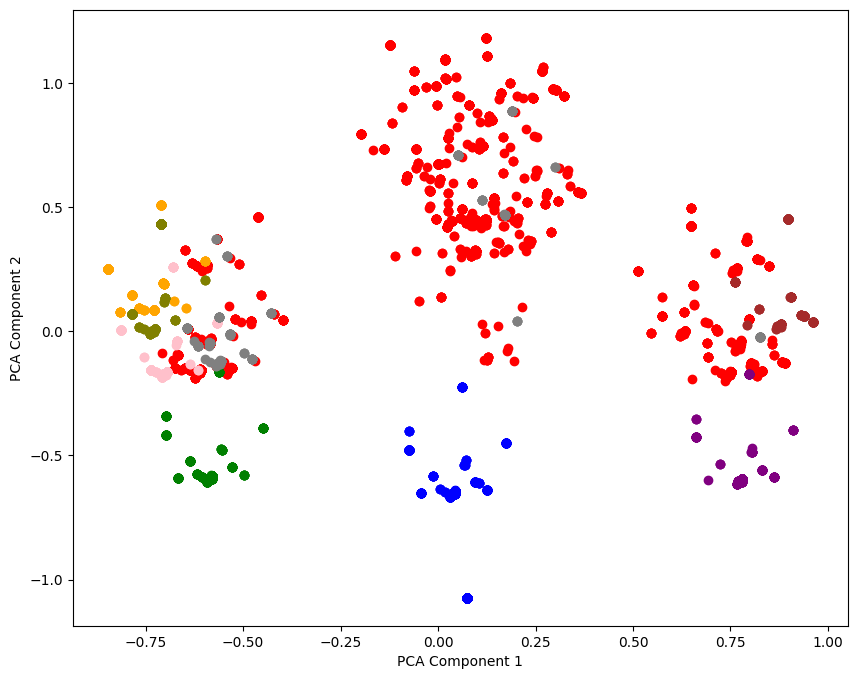

In [ ]:
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
df = pd.read_csv('Multi_Label_dataset/train.csv')
df = df.dropna()
df = df.iloc[:,2:-1]
# 데이터 로드
X = df
# 최적의 클러스터 수 찾기
silhouette_scores = []
for n_clusters in range(2, 11):
    km = KModes(n_clusters=n_clusters)
    clusters = km.fit_predict(X)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)
best_n_clusters = np.argmax(silhouette_scores) + 2
print('Best number of clusters: ', best_n_clusters)
# k-modes 모델 생성
km = KModes(n_clusters=best_n_clusters)
# 모델 학습
clusters = km.fit_predict(X)
# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(best_n_clusters):
    cluster_data = X_pca[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [1]:
import pandas as pd
from kmodes.kmodes import KModes

# 데이터 로드
df = pd.read_csv('Multi_Label_dataset/train.csv')

# k-modes 모델 생성
n_clusters = 9
km = KModes(n_clusters=n_clusters)

# 모델 학습
clusters = km.fit_predict(df)

# 클러스터링 결과 출력
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9']
for i in range(n_clusters):
    cluster_data = df[clusters == i]
    cluster_data['Cluster'] = cluster_names[i]
    print('Cluster {}: {}'.format(cluster_names[i], cluster_data))

# 클러스터 그룹별로 나누기
cluster_groups = [df[clusters == i] for i in range(n_clusters)]


Cluster Cluster 1:              Id                          Genre  Action  Adventure  Animation  \
0     tt0086425            ['Comedy', 'Drama']       0          0          0   
1     tt0085549  ['Drama', 'Romance', 'Music']       0          0          0   
6     tt0086361  ['Drama', 'Music', 'Romance']       0          0          0   
7     tt0085970            ['Comedy', 'Drama']       0          0          0   
11    tt0085244            ['Comedy', 'Drama']       0          0          0   
...         ...                            ...     ...        ...        ...   
7239  tt3509804          ['Drama', 'Thriller']       0          0          0   
7241  tt1241226                   ['Thriller']       0          0          0   
7245  tt2570224  ['Comedy', 'Drama', 'Family']       0          0          0   
7246  tt2505856                     ['Horror']       0          0          0   
7253  tt4179482                  ['Animation']       0          0          1   

      Biography  Com

/var/folders/4v/w4sg_9sj06j8wpwh8s3_gbl80000gn/T/ipykernel_14418/3048927680.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = cluster_names[i]
/var/folders/4v/w4sg_9sj06j8wpwh8s3_gbl80000gn/T/ipykernel_14418/3048927680.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = cluster_names[i]
/var/folders/4v/w4sg_9sj06j8wpwh8s3_gbl80000gn/T/ipykernel_14418/3048927680.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [2]:
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9']
clustered_data = pd.DataFrame(df)
clustered_data['Cluster'] = [cluster_names[i] for i in clusters]
clustered_data

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Cluster
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Cluster 1
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,Cluster 1
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Cluster 2
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,Cluster 7
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Cluster 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,tt2409818,"['Action', 'Crime', 'Thriller']",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,Cluster 3
7250,tt2062622,"['Animation', 'Comedy', 'Family']",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Cluster 6
7251,tt2442502,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Cluster 2
7252,tt3455850,['Documentary'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Cluster 5


In [5]:
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           7254 non-null   object
 1   Genre        7254 non-null   object
 2   Action       7254 non-null   int64 
 3   Adventure    7254 non-null   int64 
 4   Animation    7254 non-null   int64 
 5   Biography    7254 non-null   int64 
 6   Comedy       7254 non-null   int64 
 7   Crime        7254 non-null   int64 
 8   Documentary  7254 non-null   int64 
 9   Drama        7254 non-null   int64 
 10  Family       7254 non-null   int64 
 11  Fantasy      7254 non-null   int64 
 12  History      7254 non-null   int64 
 13  Horror       7254 non-null   int64 
 14  Music        7254 non-null   int64 
 15  Musical      7254 non-null   int64 
 16  Mystery      7254 non-null   int64 
 17  N/A          7254 non-null   int64 
 18  News         7254 non-null   int64 
 19  Reality-TV   7254 non-null 

In [3]:
clustered_data_one_hot = clustered_data.drop(clustered_data.columns[2:27], axis=1)
clustered_data_one_hot

,Id,Genre,Cluster
0,tt0086425,"['Comedy', 'Drama']",Cluster 1
1,tt0085549,"['Drama', 'Romance', 'Music']",Cluster 1
2,tt0086465,['Comedy'],Cluster 2
3,tt0086567,"['Sci-Fi', 'Thriller']",Cluster 7
4,tt0086034,"['Action', 'Adventure', 'Thriller']",Cluster 8
...,...,...,...
7249,tt2409818,"['Action', 'Crime', 'Thriller']",Cluster 3
7250,tt2062622,"['Animation', 'Comedy', 'Family']",Cluster 6
7251,tt2442502,['Comedy'],Cluster 2
7252,tt3455850,['Documentary'],Cluster 5


In [4]:
df_onehot = pd.get_dummies(clustered_data_one_hot, columns=['Cluster'])
df_onehot

,Id,Genre,Cluster_Cluster 1,Cluster_Cluster 2,Cluster_Cluster 3,Cluster_Cluster 4,Cluster_Cluster 5,Cluster_Cluster 6,Cluster_Cluster 7,Cluster_Cluster 8,Cluster_Cluster 9
0,tt0086425,"['Comedy', 'Drama']",1,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",1,0,0,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,1,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7249,tt2409818,"['Action', 'Crime', 'Thriller']",0,0,1,0,0,0,0,0,0
7250,tt2062622,"['Animation', 'Comedy', 'Family']",0,0,0,0,0,1,0,0,0
7251,tt2442502,['Comedy'],0,1,0,0,0,0,0,0,0
7252,tt3455850,['Documentary'],0,0,0,0,1,0,0,0,0


In [ ]:
!pip install torchvision

  Using cached torchvision-0.15.1-cp310-cp310-macosx_10_9_x86_64.whl (1.5 MB)
     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/139.8 MB 40.3 kB/s eta 0:56:18

In [8]:
!pip install tqdm

In [20]:
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
# 이미지 불러오기
width = 400
height = 300
transform = transforms.Compose([
    transforms.Resize((width, height)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # RGB 값의 평균과 표준편차
])
X = []
for i in tqdm(range(df_onehot.shape[0])):
    path = 'Multi_Label_dataset/Images/' + str(df_onehot['Id'][i]) + '.jpg'
    img = Image.open(path).convert('RGB')
    img = transform(img)
    img = img.numpy()
#     img = np.transpose(img, (1,2,0))
    X.append(img)

100%|██████████████████████████████████████| 7254/7254 [00:22<00:00, 328.86it/s]


In [21]:
from sklearn.model_selection import train_test_split
import numpy as np
X = np.array(X)
y = df_onehot.drop(['Id','Genre'],axis=1)
y = y.to_numpy()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# X_train.shape, y_train.shape
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
def atleastOneMatch(y_true, y_pred):
    total_count=len(y_true)
    total_match=0
    for i in range(0, len(y_true)):
        if(np.any(y_true[i][y_pred[i]==1])):
            total_match+=1
    return total_match/total_count
            
def allMatch(y_true, y_pred):
    total_count=len(y_true)
    total_match=0
    for i in range(y_true.shape[0]):
        if(np.all(y_true[i]==y_pred[i])):
            total_match+=1
    return total_match/total_count

def accuracy_score(y_true, y_pred):
    y_pred = np.concatenate(tuple(y_pred))
    y_true = np.concatenate(tuple([[t for t in y] for y in y_true])).reshape(y_pred.shape)
    return (y_true == y_pred).sum() / float(len(y_true))

def split_list(A, n):
    f = [A[i:i+n] for i in range(0, len(A), n)]
    return f

In [23]:
n_epochs = 5
learning_rate = 1e-03
batch_size = 64
# Print all of the hyperparameters of the training iteration:
print("===== HYPERPARAMETERS =====")
print("epochs=", n_epochs)
print("learning_rate=", learning_rate)
print("batch size=", batch_size)
print("=" * 30)

===== HYPERPARAMETERS =====
epochs= 5
learning_rate= 0.001
batch size= 64


In [24]:
import torch
import torch.nn as nn
import time
import os
from torch.autograd import Variable
import torch.nn.functional as F
class SimpleCNN(torch.nn.Module):

    # Our batch shape for input x is (1, number_of_unique_kos, genome_size)

    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(5,5)).to(device)
        nn.init.xavier_uniform_(self.conv1.weight)
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2)).to(device)
        self.drop1 = nn.Dropout2d(p=0.25).to(device)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(5,5)).to(device)
        nn.init.xavier_uniform_(self.conv2.weight)
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2)).to(device)
        self.drop2 = nn.Dropout2d(p=0.25).to(device)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5,5)).to(device)
        nn.init.xavier_uniform_(self.conv3.weight)
        self.pool3 = nn.MaxPool2d(kernel_size=(2,2)).to(device)
        self.drop3 = nn.Dropout2d(p=0.25).to(device)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(5,5)).to(device)
        nn.init.xavier_uniform_(self.conv4.weight)
        self.pool4 = nn.MaxPool2d(kernel_size=(2,2)).to(device)
        self.drop4 = nn.Dropout2d(p=0.25).to(device)

        # self.fc1 = torch.nn.Linear(16384, 128).to(device)
        self.fc1 = torch.nn.Linear(64 * 15 * 21, 128).to(device)
        nn.init.xavier_uniform_(self.fc1.weight)
        self.drop5 = nn.Dropout(p=0.5).to(device)

        self.fc2 = torch.nn.Linear(128, 64).to(device)
        nn.init.xavier_uniform_(self.fc2.weight)
        self.drop6 = nn.Dropout(p=0.5).to(device)

        self.fc3 = torch.nn.Linear(64, 9).to(device)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.drop1(x)

        x = F.relu(self.conv2(x))  
        x = self.pool2(x)  
        x = self.drop2(x)             

        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = self.drop3(x)

        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = self.drop4(x) 

        # x = x.reshape(-1, 16384)
        x = x.reshape(-1, 64 * 15 * 21)
        x = self.fc1(x)
        x = self.drop5(x) 
        x = self.fc2(x)
        x = self.drop6(x) 
        x = self.fc3(x)

        return torch.sigmoid(x)

In [25]:
if torch.backends.mps.is_available():
    device = 'mps:0'
else:
    device = 'cpu'

In [27]:
running_loss = 0.0
net = SimpleCNN()

optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss = torch.nn.BCELoss().to(device)

batches = split_list(X_train, batch_size)
batches_ind = split_list(range(len(X_train)), batch_size)
n_batches = len(batches)

N = len(X_train)
print(X_train.shape)
training_start_time = time.time()
for epoch in tqdm(range(n_epochs)):
    
    running_loss = 0.0
    print_every = 15 # N // 50
    start_time = time.time()
    total_train_loss = 0
    total_output = torch.zeros(len(X_train),9)
    
    for ind in range(n_batches):
        
        batch_elements = [el for el in batches[ind]]
        batch_ind = [el for el in batches_ind[ind]]
        

#         input_data = torch.tensor(load_data(batch_elements))
        input_data = torch.tensor(batches[ind])
        
        if len(input_data) != batch_size:
            batch_size = len(input_data)
        
        input_data = torch.tensor(input_data, dtype=torch.float32).to(device)

        labels = torch.from_numpy(y[batch_ind]).to(device)
        optimizer.zero_grad()

        # Forward pass, backward pass, optimize
        output = net(input_data)
        total_output[torch.tensor(batch_ind),:] = output.cpu().detach()
        loss_size = loss(output, labels.float())
        loss_size.backward()
        optimizer.step()   
        
        #Print statistics
        running_loss += loss_size.data.item()
        total_train_loss += loss_size.item()
        
        if ind % print_every == 0:
            print("Epoch {}, {:d}% \t train_loss: {:.4f} took: {:.4f}s".format(
                epoch + 1, int(100 * (ind + 1) / n_batches), running_loss / print_every, time.time() - start_time))
            # Reset running loss and time
            running_loss = 0.0
            start_time = time.time()
    train_acc = accuracy_score(y_train,(total_output>0.5).data.numpy())
    print("\n" + "Train Accuracy: {:.4f}".format(train_acc))     

(5803, 3, 400, 300)


  0%|                                                     | 0/5 [00:00<?, ?it/s]/var/folders/4v/w4sg_9sj06j8wpwh8s3_gbl80000gn/T/ipykernel_14418/1013983426.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(input_data, dtype=torch.float32).to(device)


Epoch 1, 1% 	 train_loss: 0.0606 took: 12.7585s
Epoch 1, 17% 	 train_loss: 0.4230 took: 181.5737s
Epoch 1, 34% 	 train_loss: 0.3356 took: 183.3289s
Epoch 1, 50% 	 train_loss: 0.3273 took: 186.4100s
Epoch 1, 67% 	 train_loss: 0.3164 took: 189.0980s
Epoch 1, 83% 	 train_loss: 0.3239 took: 317.2537s


 20%|████████▏                                | 1/5 [20:44<1:22:57, 1244.48s/it]

Epoch 1, 100% 	 train_loss: 0.3257 took: 174.0037s

Train Accuracy: 0.8723
Epoch 2, 1% 	 train_loss: 0.0213 took: 12.0127s
Epoch 2, 17% 	 train_loss: 0.3128 took: 181.9580s
Epoch 2, 34% 	 train_loss: 0.2947 took: 184.8897s
Epoch 2, 50% 	 train_loss: 0.2973 took: 184.0617s
Epoch 2, 67% 	 train_loss: 0.2992 took: 328.3958s
Epoch 2, 83% 	 train_loss: 0.3096 took: 185.2264s


 40%|████████████████▍                        | 2/5 [41:40<1:02:34, 1251.51s/it]

Epoch 2, 100% 	 train_loss: 0.3120 took: 179.8493s

Train Accuracy: 0.8846
Epoch 3, 1% 	 train_loss: 0.0200 took: 12.8281s
Epoch 3, 17% 	 train_loss: 0.3002 took: 184.4122s
Epoch 3, 34% 	 train_loss: 0.2887 took: 184.5762s
Epoch 3, 50% 	 train_loss: 0.2920 took: 505.2432s
Epoch 3, 67% 	 train_loss: 0.2913 took: 183.7994s
Epoch 3, 83% 	 train_loss: 0.3028 took: 185.3525s


 60%|████████████████████████▌                | 3/5 [1:05:35<44:30, 1335.03s/it]

Epoch 3, 100% 	 train_loss: 0.3048 took: 178.1808s

Train Accuracy: 0.8849
Epoch 4, 1% 	 train_loss: 0.0201 took: 12.9307s
Epoch 4, 17% 	 train_loss: 0.2975 took: 185.2028s
Epoch 4, 34% 	 train_loss: 0.2861 took: 4738.5991s
Epoch 4, 50% 	 train_loss: 0.2871 took: 27366.8438s
Epoch 4, 67% 	 train_loss: 0.2881 took: 188.4758s
Epoch 4, 83% 	 train_loss: 0.3004 took: 186.5298s


 80%|█████████████████████████████▌       | 4/5 [10:13:14<3:49:40, 13780.56s/it]

Epoch 4, 100% 	 train_loss: 0.3006 took: 180.9195s

Train Accuracy: 0.8866
Epoch 5, 1% 	 train_loss: 0.0190 took: 12.7491s
Epoch 5, 17% 	 train_loss: 0.2929 took: 185.1513s
Epoch 5, 34% 	 train_loss: 0.2816 took: 185.0136s
Epoch 5, 50% 	 train_loss: 0.2829 took: 184.7957s
Epoch 5, 67% 	 train_loss: 0.2866 took: 187.3485s
Epoch 5, 83% 	 train_loss: 0.2959 took: 187.5418s


100%|████████████████████████████████████████| 5/5 [10:31:59<00:00, 7583.82s/it]

Epoch 5, 100% 	 train_loss: 0.2996 took: 181.5974s

Train Accuracy: 0.8853


In [29]:
torch.save(net.state_dict(),'SimpleCNN.pth')